# Project

## 1.Title of the Project:
Loan Prediction based on Customer Behaviour

## 2. Brief on the Project:
This project predicts who are the possible Defaulters are for the Consumer Loans Product. It consist of following features:

a. Income - Income of the user

b. Age - Age of the user

c. Experience - Professional experience of the user in years

d. Profession - Profession

e. Married - Whether married or single

f. House_ownership - Owned or rented or neither

g. Car_ownership - Does the person own a car

h. Risk_flag - If defaulted on a loan. It consist of 2 values, i.e. 0 (granting loan is safe) and 1 (granting loan is risky).

i. Current job years - Years of experience in the current job

j. Current house years - Number of years in the current residence

k. City - City of residence

l. State - State of residence

## 3.  Steps for project completion:
    a. Collecting & analyzing the data
    b. Feature selection and feature engineering
    c. Outlier detection and treatment
    d. Missing value detection and treatment
    e. Model building 
    f. Checking training and testing accuracy
    Models used are Logistics regression, Decision tree, Random forest, K-Nearest Neighbor and Gaussian Naive Bayes. 
    g. Accuracy score will be compared to select the best model

## 4.Resources:
### Data source- https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior
(This dataset belongs to a Hackathon organized by "Univ.AI")
### Software: Jupyter Notebook used for data analysis and model building

## Individual Details:
 Name: Vidit Kumar Pal, Email: vidit.20.pal@gmail.com, Contact: +91-7985431988

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [2]:
df=pd.read_csv("D:\Data Science\iit guwahati\course\projects made\Loan Prediction\Training Data.csv")

In [3]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [5]:
df.shape

(252000, 13)

In [6]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [8]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [9]:
def unclean_names(col):
    unclean_names=[]
    for name in df[str(col)].unique():
        if name.endswith(']'):
            unclean_names.append(name)
    return unclean_names

unclean_city_names=unclean_names('CITY')
unclean_city_names

['Tiruchirappalli[10]',
 'Kota[6]',
 'Hajipur[31]',
 'Erode[17]',
 'Anantapuram[24]',
 'Aurangabad[39]',
 'Purnia[26]',
 'Eluru[25]',
 'Siwan[32]',
 'Motihari[34]',
 'Warangal[11][12]',
 'Jehanabad[38]',
 'Kishanganj[35]',
 'Tirupati[21][22]',
 'Kurnool[18]',
 'Kadapa[23]',
 'Jammu[16]',
 'Rajahmundry[19][20]',
 'Saharsa[29]',
 'Jamalpur[36]',
 'Dehri[30]',
 'Nellore[14][15]',
 'Visakhapatnam[4]',
 'Buxar[37]',
 'Ramagundam[27]',
 'Sasaram[30]',
 'Guntur[13]',
 'Chittoor[28]',
 'Bettiah[33]',
 'Mysore[7][8][9]']

In [10]:
unclean_state_names=unclean_names('STATE')
unclean_state_names

['Uttar_Pradesh[5]']

In [11]:
def clean_df(df,col,unclean_list):
    for index,name in enumerate(df[col]):
        if name in unclean_list:
            name_=name.strip('[]0123456789')
            df[col].iloc[index]=name_

clean_df(df,'STATE',unclean_state_names)
clean_df(df,'CITY',unclean_city_names)

In [12]:
df['CITY']

0                    Rewa
1                Parbhani
2               Alappuzha
3             Bhubaneswar
4         Tiruchirappalli
               ...       
251995            Kolkata
251996               Rewa
251997    Kalyan-Dombivli
251998        Pondicherry
251999              Avadi
Name: CITY, Length: 252000, dtype: object

<AxesSubplot:>

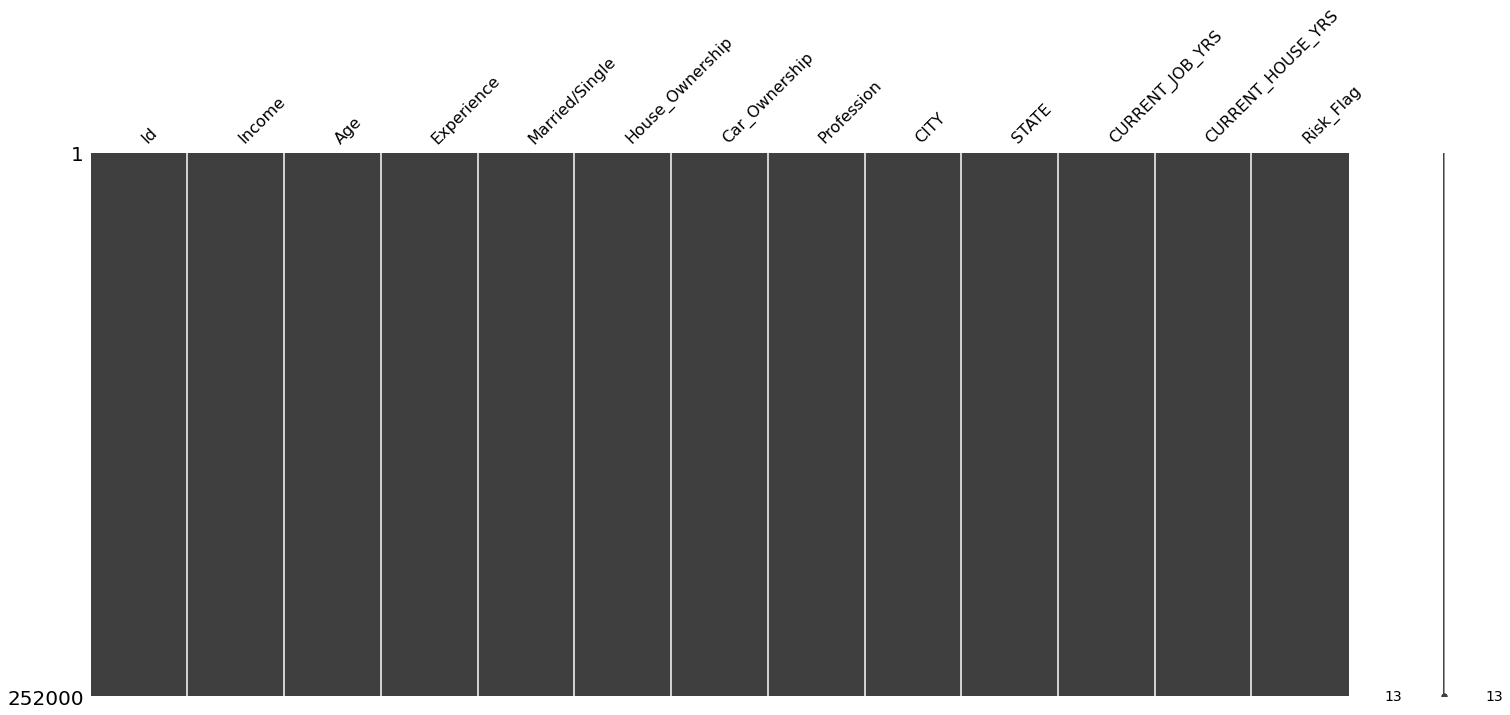

In [13]:
msno.matrix(df)

In [14]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

<AxesSubplot:xlabel='Income'>

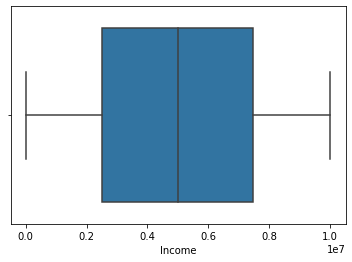

In [15]:
sns.boxplot(df['Income'])

<AxesSubplot:xlabel='CURRENT_JOB_YRS'>

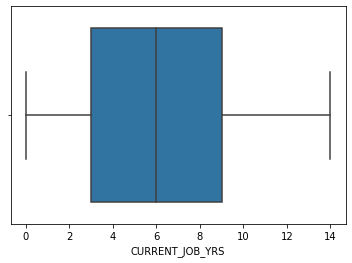

In [16]:
sns.boxplot(df['CURRENT_JOB_YRS'])

<AxesSubplot:xlabel='CURRENT_HOUSE_YRS'>

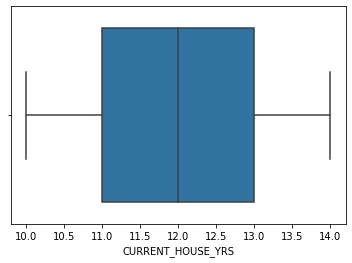

In [17]:
sns.boxplot(df['CURRENT_HOUSE_YRS'])

<AxesSubplot:xlabel='Experience'>

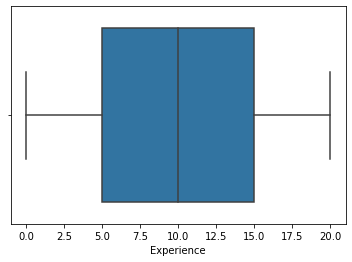

In [18]:
sns.boxplot(df['Experience'])

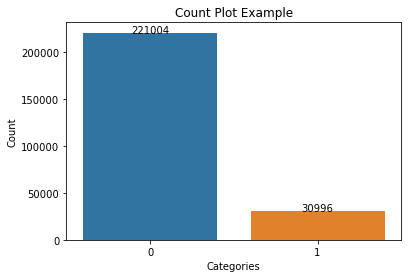

In [19]:
ax=sns.countplot(df['Risk_Flag'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count Plot Example')

#Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center')
                
plt.show()

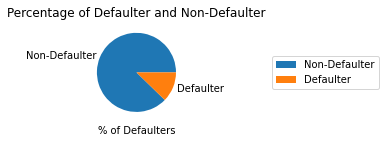

In [20]:
fig=plt.figure()
ax=fig.add_subplot(2,1,1,anchor='C')
plt.title('Percentage of Defaulter and Non-Defaulter')
df.groupby('Risk_Flag').count()['Id'].plot(kind='pie',labels=['Non-Defaulter','Defaulter'])
plt.xlabel('% of Defaulters')
plt.ylabel(' ')
plt.legend(loc='right',bbox_to_anchor=(2,0,1,1))

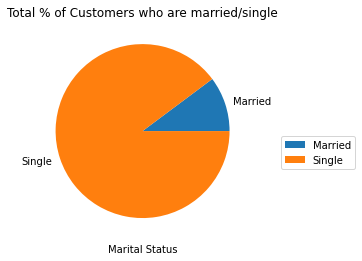

In [21]:
df.groupby('Married/Single').count()['Id'].plot(kind='pie',startangle=0,labels=['Married','Single'])
plt.xlabel('Marital Status')
plt.ylabel(' ')
plt.title('Total % of Customers who are married/single')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

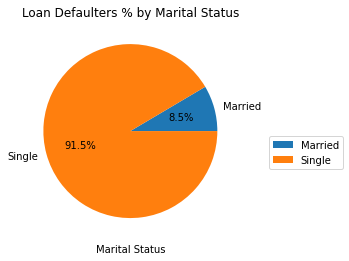

In [22]:
marital_status = df.loc[df[ 'Risk_Flag'] == 1].groupby( 'Married/Single').count()['Id']
marital_status.plot(kind='pie', startangle=0,labels=[ 'Married', 'Single'], autopct='%1.1f%%')
plt.xlabel('Marital Status')
plt.ylabel('')
plt.title('Loan Defaulters % by Marital Status') 
plt.legend (loc='best', bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

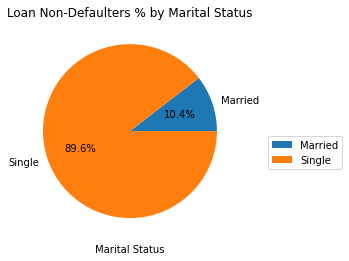

In [23]:
marital_status = df.loc[df[ 'Risk_Flag'] == 0].groupby( 'Married/Single').count()['Id']
marital_status.plot(kind='pie', startangle=0,labels=[ 'Married', 'Single'], autopct='%1.1f%%')
plt.xlabel('Marital Status')
plt.ylabel('')
plt.title('Loan Non-Defaulters % by Marital Status') 
plt.legend (loc='best', bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

In [24]:
df['Risk_Flag'][df["Risk_Flag"]==1].groupby(by=df['Married/Single']).count()

Married/Single
married     2636
single     28360
Name: Risk_Flag, dtype: int64

In [25]:
df['Risk_Flag'][df["Risk_Flag"]==0].groupby(by=df['Married/Single']).count()

Married/Single
married     23092
single     197912
Name: Risk_Flag, dtype: int64

In [27]:
house_ownership_count=df.groupby('House_Ownership').count()['Id']
house_ownership_count

House_Ownership
norent_noown      7184
owned            12918
rented          231898
Name: Id, dtype: int64

(0.0, 250000.0)

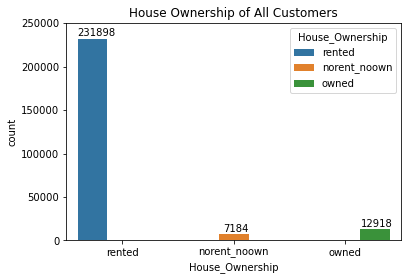

In [28]:
sns.countplot(data=df,x='House_Ownership',hue="House_Ownership")
plt.text(-0.4,235000,str(231898))
plt.text(0.9,10000,str(7184))
plt.text(2.14,16000,str(12918))
plt.title('House Ownership of All Customers')
plt.ylim(0,250000)

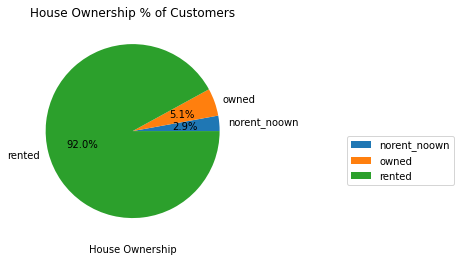

In [29]:
df.groupby('House_Ownership').count()['Id'].plot(kind='pie',startangle=0,autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('House Ownership')
plt.title('House Ownership % of Customers')
plt.legend(loc='best',bbox_to_anchor=(1.5,0,0.5,0.5))

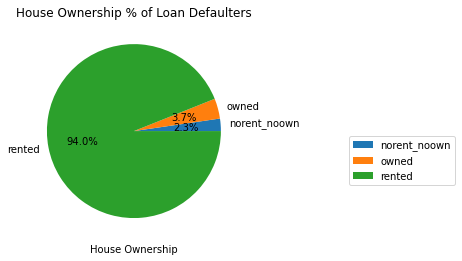

In [30]:
df.loc[df['Risk_Flag']==1].groupby('House_Ownership').count()['Id'].plot(kind='pie',startangle=0,autopct='%1.1f%%')
plt.ylabel('')
plt.title('House Ownership % of Loan Defaulters')
plt.xlabel('House Ownership')
plt.legend(loc='best',bbox_to_anchor=(1.5,0,0.5,0.5))

In [31]:
car_ownership=df.groupby('Car_Ownership').count()['Id']
car_ownership

Car_Ownership
no     176000
yes     76000
Name: Id, dtype: int64

(0.0, 200000.0)

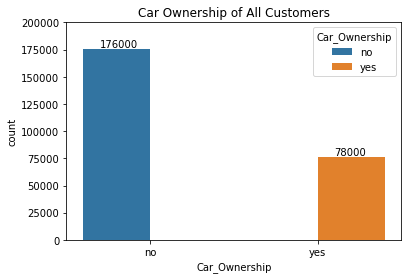

In [32]:
sns.countplot(data=df,x='Car_Ownership',hue="Car_Ownership")
plt.text(-0.3,177000,str(176000))
plt.text(1.1,78000,str(78000))
plt.title('Car Ownership of All Customers')
plt.ylim(0,200000)

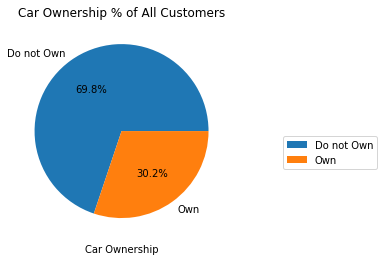

In [33]:
car_ownership.plot(kind='pie',startangle=0,labels=['Do not Own','Own'],autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Car Ownership')
plt.title('Car Ownership % of All Customers')
plt.legend(loc='best',bbox_to_anchor=(1.2,0,0.5,0.5))
plt.show()

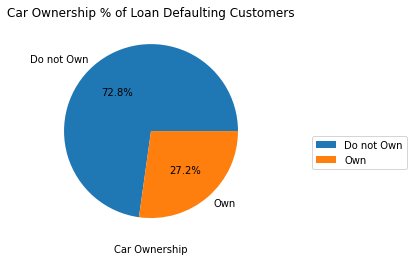

In [34]:
car_ownership_default=df.loc[df['Risk_Flag']==1].groupby('Car_Ownership').count()['Id']
car_ownership_default.plot(kind='pie',startangle=0,labels=['Do not Own','Own'],autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Car Ownership')
plt.title('Car Ownership % of Loan Defaulting Customers')
plt.legend(loc='best',bbox_to_anchor=(1.2,0,0.5,0.5))
plt.show()

In [35]:
df1=df.loc[df['Risk_Flag']==1].groupby(['STATE','Risk_Flag']).count()
df1.rename(columns={'Id':'Total_Defaulters'},inplace=True)
df1.reset_index(inplace=True)
df1[['STATE','Total_Defaulters']]

,STATE,Total_Defaulters
0,Andhra_Pradesh,2935
1,Assam,930
2,Bihar,2583
3,Chandigarh,61
4,Chhattisgarh,511
5,Delhi,574
6,Gujarat,1343
7,Haryana,980
8,Himachal_Pradesh,111
9,Jammu_and_Kashmir,283


In [36]:
df2=df.groupby('STATE').count()
df2.rename(columns={'Id':'Total_Loans'},inplace=True)
df2.reset_index(inplace=True)

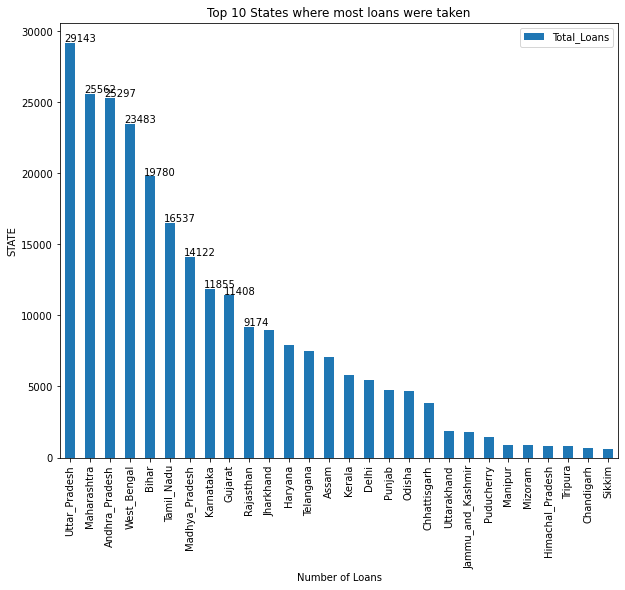

In [37]:
df_total_loans=df2[['STATE','Total_Loans']].sort_values(by='Total_Loans',ascending=False)
df_total_loans.plot(kind='bar',x='STATE',figsize=(10,8))
plt.title('Top 10 States where most loans were taken')
plt.xlabel('Number of Loans')
plt.ylabel('STATE')
for index,value in enumerate(df_total_loans['Total_Loans'][:10]):
    plt.text(index-0.28,value+100,str(value))
plt.show()

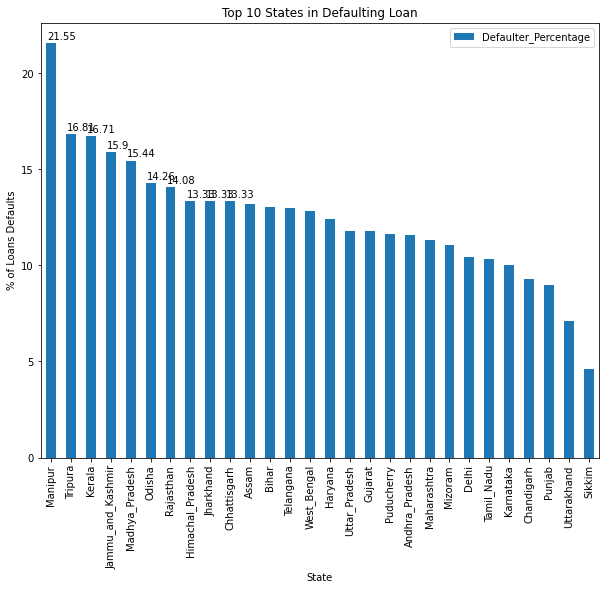

In [38]:
defaulter_percent_per_state=(df1['Total_Defaulters']/df2['Total_Loans']).round(4)*100
state_defaulters_percentage=pd.DataFrame(data=zip(df1['STATE'],defaulter_percent_per_state),
                                        columns=['STATE','Defaulter_Percentage'])
df_dps=state_defaulters_percentage.sort_values(by='Defaulter_Percentage',ascending=False)
df_dps.plot(kind='bar',figsize=(10,8),x='STATE')
plt.title('Top 10 States in Defaulting Loan')
plt.ylabel('% of Loans Defaults')
plt.xlabel('State')
for index,value in enumerate(df_dps['Defaulter_Percentage'][:10]):
    plt.text(index-0.2,value+0.2,str(round(value,2)))
plt.legend(loc='best')
plt.show()

In [39]:
df3=df.groupby('CITY').count()
df3.rename(columns={'Id':'Total_Loans'},inplace=True)
df3.reset_index(inplace=True)
df3[['CITY','Total_Loans']]

,CITY,Total_Loans
0,Adoni,953
1,Agartala,809
2,Agra,1012
3,Ahmedabad,649
4,Ahmednagar,645
...,...,...
311,Vijayanagaram,1259
312,Vijayawada,1172
313,Visakhapatnam,971
314,Warangal,459


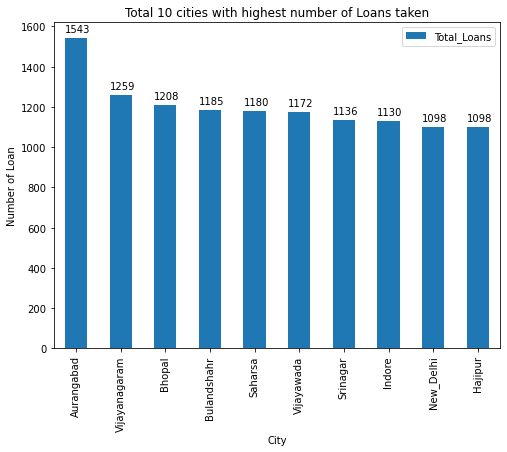

In [40]:
#top 10 cities in number of loans

df3_=df3[['CITY','Total_Loans']].sort_values(by='Total_Loans',ascending=False)[:10]
df3_.plot(kind='bar',x='CITY',figsize=(8,6))
plt.title('Total 10 cities with highest number of Loans taken')
plt.xlabel('City')
plt.ylabel('Number of Loan')
for index,value in enumerate(df3_['Total_Loans']):
    plt.text(index-0.25,value+30,str(int(value)))
plt.legend(loc='best')
plt.show()

In [41]:
df4=df.loc[df['Risk_Flag']==1].groupby('CITY').count()
df4.rename(columns={'Id':'Total_Defaulters'},inplace=True)
df4.reset_index(inplace=True)
df4[['CITY','Total_Defaulters']]

,CITY,Total_Defaulters
0,Adoni,103
1,Agartala,136
2,Agra,81
3,Ahmedabad,133
4,Ahmednagar,38
...,...,...
311,Vijayanagaram,149
312,Vijayawada,147
313,Visakhapatnam,141
314,Warangal,25


In [42]:
defaulter_percent_per_city=(df4['Total_Defaulters']/df3['Total_Loans']).round(4)*100
city_defaulters_percentage=pd.DataFrame(data=zip(df3['CITY'],
        defaulter_percent_per_city),columns=['CITY','Defaulter_Percentage'])
city_defaulters_percentage

,CITY,Defaulter_Percentage
0,Adoni,10.81
1,Agartala,16.81
2,Agra,8.00
3,Ahmedabad,20.49
4,Ahmednagar,5.89
...,...,...
311,Vijayanagaram,11.83
312,Vijayawada,12.54
313,Visakhapatnam,14.52
314,Warangal,5.45


<Figure size 1080x360 with 0 Axes>

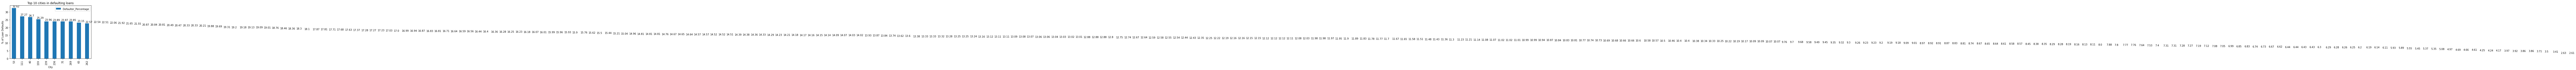

In [43]:
plt.figure(figsize=(15,5))
city_defaulters_percentage.sort_values(by='Defaulter_Percentage',ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 cities in defaulting loans')
plt.xlabel('City')
plt.ylabel('% of Loan Defaults')
plt.legend(loc='best')
top_10_vals=city_defaulters_percentage['Defaulter_Percentage'].sort_values(ascending=False)
for index,value in enumerate(top_10_vals):
    plt.text(index-0.2,value+0.5,str(round(value,2)))
plt.show()

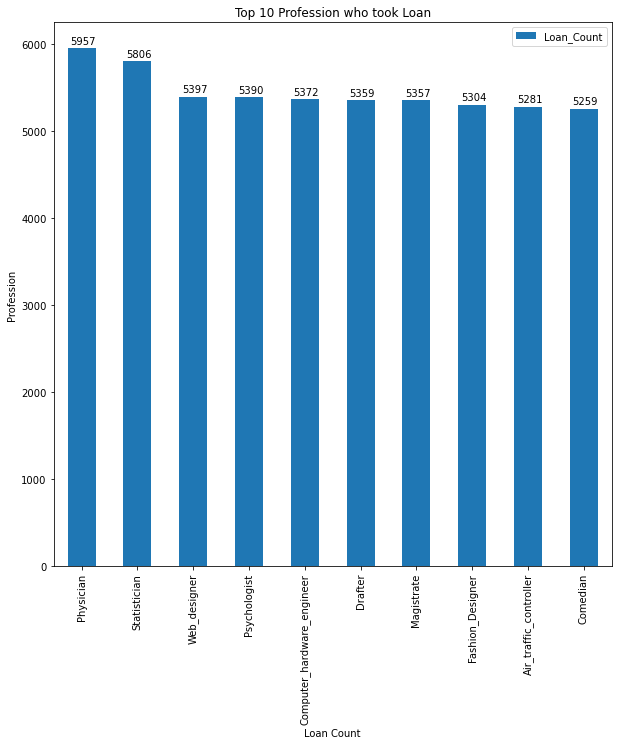

In [44]:
df_profession_loan_count=df.groupby('Profession').count()['Id'].sort_values(ascending=False)
df_plc=df_profession_loan_count.reset_index()
df_plc.rename(columns={'Id':'Loan_Count'},inplace=True)
df_plc[:10].plot(kind='bar',x='Profession',figsize=(10,10))
plt.legend(loc='best')
plt.title('Top 10 Profession who took Loan')
plt.xlabel('Loan Count')
plt.ylabel('Profession')
for index,value in enumerate(df_plc['Loan_Count'][:10]):
    plt.text(index-0.2,value+50,str(value))
plt.show()

In [45]:
profession=df.groupby(['Profession']).mean()[['Income','Risk_Flag']]

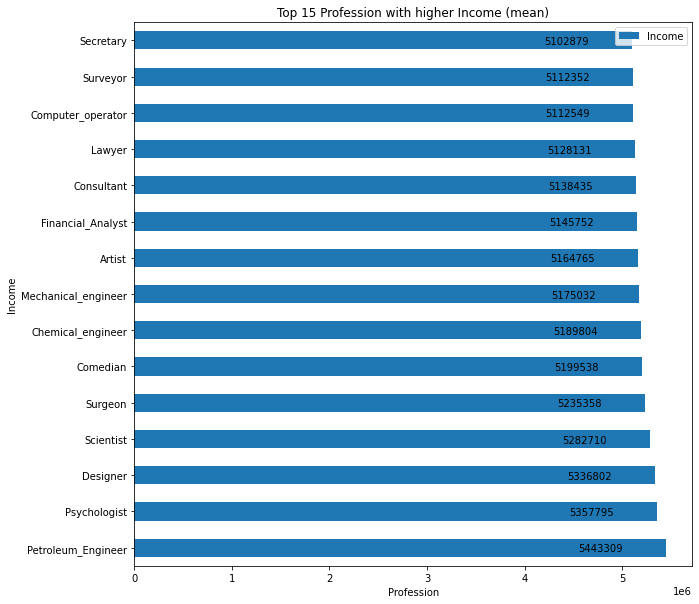

In [46]:
#plotting top10 profession_group with higher income

profession_top10_income=profession['Income'].sort_values(ascending=False)[:15]
profession_top10_income.plot(kind='barh',figsize=(10,10))
plt.title('Top 15 Profession with higher Income (mean)')
plt.xlabel('Profession')
plt.ylabel('Income')

for index,value in enumerate(profession_top10_income):
    plt.text(value-900000,index-0.1,str(int(value)))
plt.legend(loc='best')
plt.show()

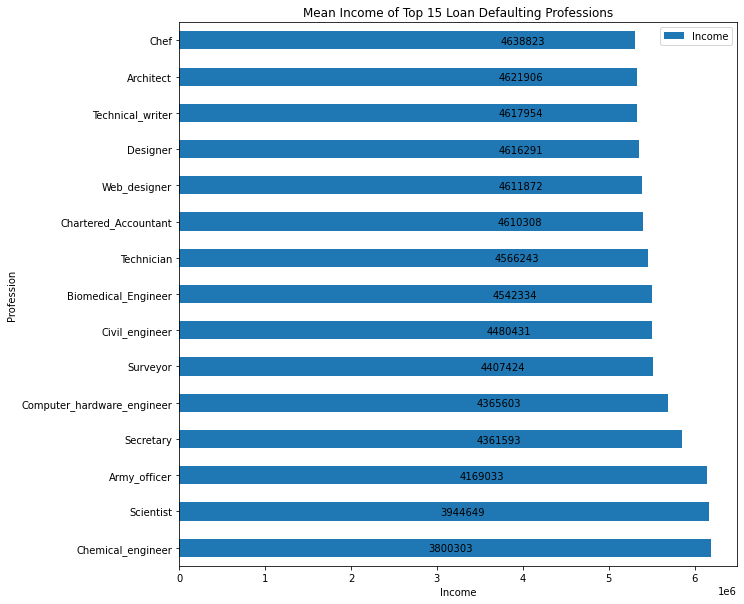

In [47]:
df_=df.loc[df['Risk_Flag']==1].groupby(['Profession']).mean()[['Income']].sort_values(by='Income')
df_.sort_values(by='Income',ascending=False)[:15].plot(kind='barh',figsize=(10,10))
plt.title('Mean Income of Top 15 Loan Defaulting Professions')
plt.xlabel('Income')
plt.ylabel('Profession')
for index,value in enumerate(df_['Income'][:15]):
    plt.text(value-900000,index-0.1,str(int(value)))
    
plt.legend(loc='best')
plt.show()

### Resampling the Data

Our Dataset is a imbalanced dataset because Risk_Flag is a target variable and it contains 0 as 221004 times and 1 as 30996 times, which is not balanced. This class imbalance can pose challenge for machine learning algorithm as they tend to be biased towards the majority class, leading to poor performance on the minority class.

In [48]:
from imblearn.over_sampling import RandomOverSampler
sampler=RandomOverSampler(random_state=42,sampling_strategy=0.45)
x=df.iloc[:,:-1]
y=df['Risk_Flag']

In [49]:
x_sampled,y_sampled=sampler.fit_resample(x,y)

In [50]:
from collections import Counter
print(Counter(y),Counter(y_sampled))

Counter({0: 221004, 1: 30996}) Counter({0: 221004, 1: 99451})


We can notice from here that previously 1 was there for 30996, but after resampling, 1 is now for 99451 times.

In [51]:
df_=pd.concat([x_sampled,y_sampled],axis=1)

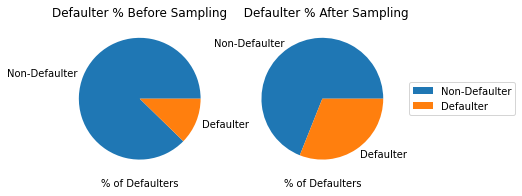

In [52]:
fig=plt.figure()
ax1=fig.add_subplot(121)
plt.title('Defaulter % Before Sampling')
df.groupby('Risk_Flag').count()['Id'].plot(kind='pie',labels=['Non-Defaulter','Defaulter'])
plt.xlabel('% of Defaulters')
plt.ylabel('')

ax2=fig.add_subplot(122)
plt.title('  Defaulter % After Sampling')
df_.groupby('Risk_Flag').count()['Id'].plot(kind='pie',labels=['Non-Defaulter','Defaulter'])
plt.xlabel('% of Defaulters')
plt.ylabel('')
plt.legend(loc='right',bbox_to_anchor=(1.7,0,0.1,1))

Here is the visual representation of Defaulter % Before Sapling and Defaulter % After Sampling

## Encoding the Categorical Data

In [53]:
cols_to_encode=['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
labelencoder=LabelEncoder()
for col in cols_to_encode:
    df_[col]=labelencoder.fit_transform(df_[col])

In [54]:
#checking for any null values
df_.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [55]:
#Drop Id as it is not needed for prediction
df_.drop(['Id'],axis=1,inplace=True)

In [56]:
df_

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,250,13,3,13,0
1,7574516,40,10,1,2,0,43,226,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,53,17,2,12,1
4,5768871,47,11,1,2,0,11,295,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
320450,9205302,77,13,1,2,1,34,80,10,11,13,1
320451,140516,29,19,1,2,0,39,310,22,14,10,1
320452,9763429,73,5,1,2,0,15,297,0,5,11,1
320453,6877905,40,9,1,2,1,30,63,25,7,11,1


In [57]:
x=df_.iloc[:,:-1]
y=df_['Risk_Flag']

## Splitting the dataset 

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## Using different ML models 

### 1. Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [60]:
predictions=logmodel.predict(x_test)

In [61]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
confusion_matrix(y_test,predictions)

array([[66611,     0],
       [29526,     0]], dtype=int64)

In [62]:
accuracy_score(y_test,predictions)

0.6928757918387302

In [63]:
report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.69      1.00      0.82     66611
           1       0.00      0.00      0.00     29526

    accuracy                           0.69     96137
   macro avg       0.35      0.50      0.41     96137
weighted avg       0.48      0.69      0.57     96137



### 2. Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score,roc_curve
from pandas_profiling import ProfileReport

In [65]:
dt_model1=DecisionTreeClassifier()
dt_model1.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.2375180773090171, 0.9883720930232558, 'X[9] <= 2.5\ngini = 0.429\nsamples = 224318\nvalue = [154393, 69925]'),
 Text(0.03560324810370417, 0.9651162790697675, 'X[1] <= 31.5\ngini = 0.469\nsamples = 31781\nvalue = [19855, 11926]'),
 Text(0.01409182490130472, 0.9418604651162791, 'X[6] <= 8.5\ngini = 0.496\nsamples = 6658\nvalue = [3610, 3048]'),
 Text(0.0021857429249236993, 0.9186046511627907, 'X[0] <= 3088960.5\ngini = 0.435\nsamples = 1430\nvalue = [458, 972]'),
 Text(0.000980226172287168, 0.8953488372093024, 'X[8] <= 21.0\ngini = 0.459\nsamples = 258\nvalue = [166, 92]'),
 Text(0.00047686678651808184, 0.872093023255814, 'X[6] <= 0.5\ngini = 0.191\nsamples = 168\nvalue = [150, 18]'),
 Text(0.00021194079400803636, 0.8488372093023255, 'X[8] <= 4.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.00010597039700401818, 0.8255813953488372, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.0003179111910120545, 0.8255813953488372, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Tex

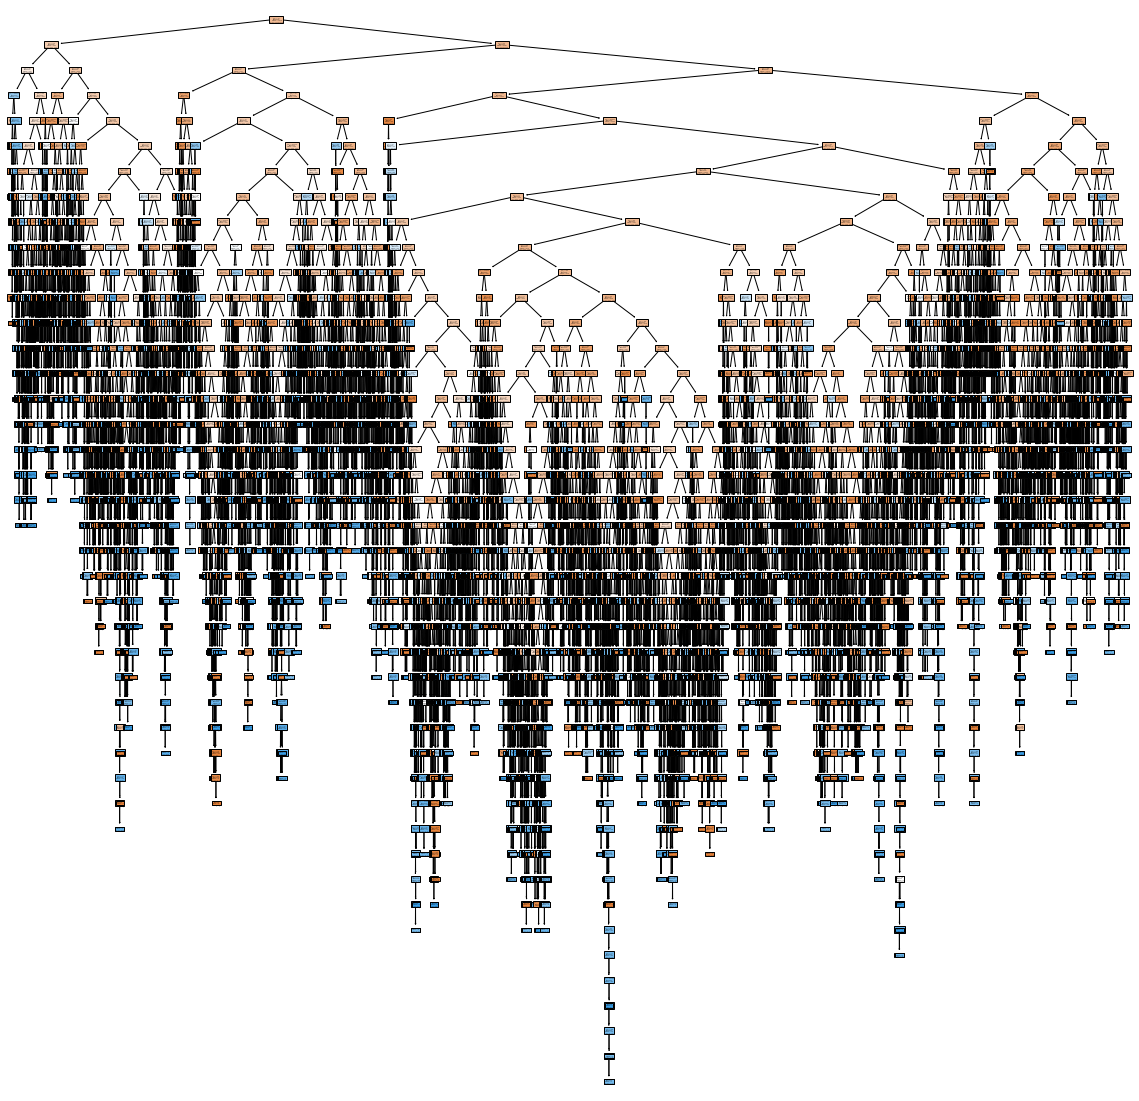

In [66]:
plt.figure(figsize=[20,20])
tree.plot_tree(dt_model1,filled=True)

In [67]:
predictions=dt_model1.predict(x_test)
predictions

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [68]:
confusion_matrix(y_test,predictions)

array([[58784,  7827],
       [  638, 28888]], dtype=int64)

In [69]:
report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     66611
           1       0.79      0.98      0.87     29526

    accuracy                           0.91     96137
   macro avg       0.89      0.93      0.90     96137
weighted avg       0.93      0.91      0.91     96137



### 3. K-Nearest Neighbor

In [70]:
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics as sm

In [71]:
knn=neighbors.KNeighborsClassifier()

In [72]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [73]:
predictions=knn.predict(x_test)

In [74]:
confusion_matrix(y_test,predictions)

array([[58895,  7716],
       [ 3964, 25562]], dtype=int64)

In [75]:
report=classification_report(y_test,predictions)

In [76]:
print(report)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     66611
           1       0.77      0.87      0.81     29526

    accuracy                           0.88     96137
   macro avg       0.85      0.87      0.86     96137
weighted avg       0.89      0.88      0.88     96137



In [77]:
knn.score(x_train,y_train)

0.8971593897948448

### 4. Gaussian Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [80]:
prediction=gnb.predict(x_test)

In [81]:
confusion_matrix(y_test,prediction)

array([[66611,     0],
       [29526,     0]], dtype=int64)

In [82]:
report=classification_report(y_test,prediction)
print(report)

              precision    recall  f1-score   support

           0       0.69      1.00      0.82     66611
           1       0.00      0.00      0.00     29526

    accuracy                           0.69     96137
   macro avg       0.35      0.50      0.41     96137
weighted avg       0.48      0.69      0.57     96137



In [83]:
gnb.score(x_train,y_train)

0.6882773562531763

### 5. Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)
#setting random seed

In [85]:
rf_model=RandomForestClassifier(n_jobs=2,random_state=0)

In [86]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [87]:
predictions=rf_model.predict(x_test)
predictions

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [88]:
confusion_matrix(y_test,predictions)

array([[60993,  5618],
       [  786, 28740]], dtype=int64)

In [89]:
report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     66611
           1       0.84      0.97      0.90     29526

    accuracy                           0.93     96137
   macro avg       0.91      0.94      0.92     96137
weighted avg       0.94      0.93      0.93     96137



In [90]:
rf_model.score(x_train,y_train)

0.9414714824490232

We can see that the maximum accuracy achieved is in Random Forest,i.e. 93%. Therefore, we will be using it for prediction.

## Future Prediction

In [91]:
data=pd.read_csv('D:\Data Science\iit guwahati\course\projects made\Loan Prediction\Test Data.csv')

In [92]:
data

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


In [93]:
data.drop(['ID'],axis=1,inplace=True)

In [94]:
data=pd.DataFrame(data)

In [95]:
d2=data.copy()

In [96]:
cols_to_encode=['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
labelencoder=LabelEncoder()
for col in cols_to_encode:
    data[col]=labelencoder.fit_transform(data[col])

In [97]:
data=data.iloc[:,:].values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
m=sc.fit_transform(data)

In [98]:
y_pred1=pd.DataFrame()   #empty dataframe

In [99]:
d2['y_pred1']=rf_model.predict(m)
d2.to_csv('final.csv')
d2

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,y_pred1
0,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13,1
1,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10,0
2,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14,1
3,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12,0
4,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10,0
27996,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14,1
27997,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13,0
27998,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14,0


### Conclusion
For dependent variable as "RISK_FLAG", 

a. Algorithms used for model building were Logistic Regression, Decision Tree, KNN, Gaussian Naive Bayes and Random Forest.

b. The best performing Machine Learning Model in terms of Accuracy Score is Random Forest with testing accuracy 93%.